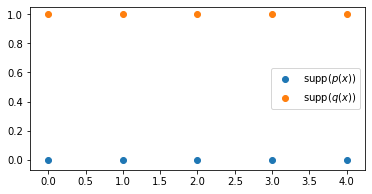

In [1]:
#https://dfdazac.github.io/sinkhorn.html#fn2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

n_points = 5
a = np.array([[i, 0] for i in range(n_points)])
b = np.array([[i, 1] for i in range(n_points)])

plt.figure(figsize=(6, 3))
plt.scatter(a[:, 0], a[:, 1], label='supp($p(x)$)')
plt.scatter(b[:, 0], b[:, 1], label='supp($q(x)$)')
plt.legend();

In [4]:
import os
os.getcwd()

'/Users/dougchang/TDS/earth_mover'

In [15]:
import torch
from layers import SinkhornDistance

x = torch.tensor(a, dtype=torch.float)
y = torch.tensor(b, dtype=torch.float)

sinkhorn = SinkhornDistance(eps=0.1, max_iter=100, reduction=None)
dist, P, C = sinkhorn(x, y)
print("Sinkhorn distance: {:.3f}".format(dist.item()))


Sinkhorn distance: 1.000


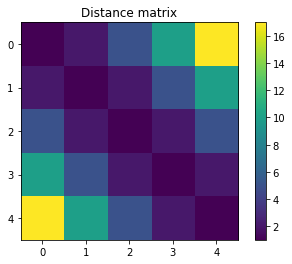

In [16]:
%matplotlib inline
plt.imshow(C)
plt.title('Distance matrix')
plt.colorbar();

In [18]:
C.shape
print(C)

tensor([[ 1.,  2.,  5., 10., 17.],
        [ 2.,  1.,  2.,  5., 10.],
        [ 5.,  2.,  1.,  2.,  5.],
        [10.,  5.,  2.,  1.,  2.],
        [17., 10.,  5.,  2.,  1.]])


In [20]:
P.shape
print(P)

tensor([[1.9999e-01, 9.0796e-06, 8.4963e-19, 1.6387e-40, 0.0000e+00],
        [9.0792e-06, 1.9998e-01, 9.0792e-06, 8.4959e-19, 1.6387e-40],
        [8.4959e-19, 9.0792e-06, 1.9998e-01, 9.0792e-06, 8.4959e-19],
        [1.6387e-40, 8.4959e-19, 9.0792e-06, 1.9998e-01, 9.0792e-06],
        [0.0000e+00, 1.6387e-40, 8.4963e-19, 9.0796e-06, 1.9999e-01]])


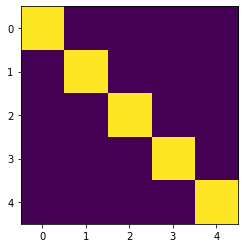

In [26]:
plt.imshow(P)


Sinkhorn distance: 1.408


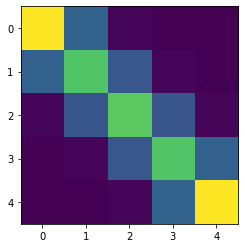

In [27]:
sinkhorn = SinkhornDistance(eps=1, max_iter=100, reduction=None)
dist, P, C = sinkhorn(x, y)
print("Sinkhorn distance: {:.3f}".format(dist.item()))
plt.imshow(P);
#regularization spreads out the values from the diagonals
#mass not distributed on the Eigenvalues

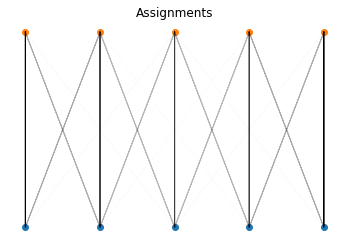

In [28]:
def show_assignments(a, b, P):    
    norm_P = P/P.max()
    for i in range(a.shape[0]):
        for j in range(b.shape[0]):
            plt.arrow(a[i, 0], a[i, 1], b[j, 0]-a[i, 0], b[j, 1]-a[i, 1],
                     alpha=norm_P[i,j].item())
    plt.title('Assignments')
    plt.scatter(a[:, 0], a[:, 1])
    plt.scatter(b[:, 0], b[:, 1])
    plt.axis('off')

show_assignments(a, b, P)